# Data Loading

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Loading up the data

In [2]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.shape

(12294, 7)

# Exploratory Data Analysis

## Univariate EDA

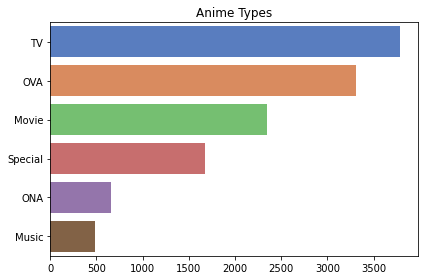

In [4]:
type_count = df['type'].value_counts()

sns.barplot(x=type_count.values, y=type_count.index,
            palette='muted').set_title('Anime Types')

plt.tight_layout()
plt.show()

## Multivariate EDA

In [5]:
df[['name', 'rating', 'members', 'type']].sort_values(by='rating', ascending=False).query('members>500000')[:5]

,name,rating,members,type
1,Fullmetal Alchemist: Brotherhood,9.26,793665,TV
3,Steins;Gate,9.17,673572,TV
13,Code Geass: Hangyaku no Lelouch R2,8.98,572888,TV
19,Code Geass: Hangyaku no Lelouch,8.83,715151,TV
23,One Punch Man,8.82,552458,TV


# Data Preparation

## Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### Rating Feature

In [8]:
df[df['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [9]:
df['rating'] = df['rating'].astype(float)

In [10]:
df['rating'].fillna(df['rating'].median(),inplace = True)

In [11]:
df['rating'].isnull().any()

False

### Type Feature

In [12]:
df.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [13]:
df[df['type'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,6.57,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,6.57,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,6.57,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,6.57,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,6.57,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,6.57,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,6.57,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,6.57,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,6.57,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,6.57,11


In [14]:
df.loc[(df['name'] == "Steins;Gate 0"), 'type'] = 'TV'
df.loc[(df['name'] == "Steins;Gate 0"), 'episodes'] = '23'
df.loc[(df['name'] == "Violet Evergarden"), 'type'] = 'TV'
df.loc[(df['name'] == "Violet Evergarden"), 'episodes'] = '13'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'type'] = 'TV'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'episodes'] = '25'
df.loc[(df['name'] == "K: Seven Stories"), 'type'] = 'Movie'
df.loc[(df['name'] == "K: Seven Stories"), 'episodes'] = '6'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'episodes'] = '12'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'type'] = 'TV'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'episodes'] = '12'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'type'] = 'TV'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'episodes'] = '12'
df.loc[(df['name'] == "Flying Babies"), 'type'] = 'TV'
df.loc[(df['name'] == "Flying Babies"), 'episodes'] = '12'
df.loc[(df['name'] == "Gamers!"), 'type'] = 'TV'
df.loc[(df['name'] == "Gamers!"), 'episodes'] = '12'
df.loc[(df['name'] == "Ganko-chan"), 'type'] = 'TV'
df.loc[(df['name'] == "Ganko-chan"), 'episodes'] = '10'
df.loc[(df['name'] == "Gekidol"), 'type'] = 'TV'
df.loc[(df['name'] == "Gekidol"), 'episodes'] = '12'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'type'] = 'OVA'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'episodes'] = '110'
df.loc[(df['name'] == "Grancrest Senki"), 'type'] = 'TV'
df.loc[(df['name'] == "Grancrest Senki"), 'episodes'] = '24'
df.loc[(df['name'] == "IDOLiSH7"), 'type'] = 'TV'
df.loc[(df['name'] == "IDOLiSH7"), 'episodes'] = '17'
df.loc[(df['name'] == "Isekai Shokudou"), 'type'] = 'TV'
df.loc[(df['name'] == "Isekai Shokudou"), 'episodes'] = '12'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'type'] = 'TV'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'episodes'] = '12'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'episodes'] = '24'
df.loc[(df['name'] == "Seikaisuru Kado"), 'type'] = 'TV'
df.loc[(df['name'] == "Seikaisuru Kado"), 'episodes'] = '12'
df.loc[(df['name'] == "UQ Holder!"), 'type'] = 'TV'
df.loc[(df['name'] == "UQ Holder!"), 'episodes'] = '12'
df.loc[(df['name'] == "Citrus"), 'type'] = 'TV'
df.loc[(df['name'] == "Citrus"), 'episodes'] = '12'
df.loc[(df['name'] == "Hitorijime My Hero"), 'type'] = 'TV'
df.loc[(df['name'] == "Hitorijime My Hero"), 'episodes'] = '12'

In [15]:
df.isnull().sum()

anime_id     0
name         0
genre       62
type         4
episodes     0
rating       0
members      0
dtype: int64

In [16]:
df.dropna(subset=['type'], inplace=True)

In [17]:
df['type'].isnull().any()

False

### Genre Feature

In [18]:
df[df['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,TV,12,6.57,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,6.57,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,6.57,843
11112,33035,Yuyushiki Special,NaN,Special,1,6.57,2294


In [19]:
df['genre'].fillna('Unknown', inplace=True)

In [20]:
df['genre'].isnull().any()

False

In [21]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [22]:
all_genres = defaultdict(int)

for genres in df['genre']:
  for genre in genres.split(','):
    all_genres[genre.strip()] += 1

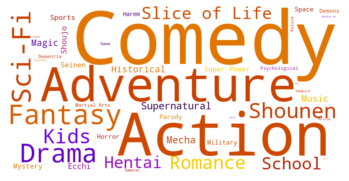

In [23]:
genres_cloud = WordCloud(width=800, height=400, background_color='white',
                         colormap='gnuplot').generate_from_frequencies(all_genres)

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Cleaning

In [24]:
def text_cleaning(text):
  text = re.sub(r'&quot;', '', text)
  text = re.sub(r'.hack//', '', text)
  text = re.sub(r'&#039;', '', text)
  text = re.sub(r'A&#039;s', '', text)
  text = re.sub(r'I&#039;', 'I\'', text)
  text = re.sub(r'&amp;', 'and', text)
  return text

df['name'] = df['name'].apply(text_cleaning)

# Modelling and Result

## Content Based Filtering

### TF-IDF Vectorizer

In [25]:
tf = TfidfVectorizer()
tf.fit(df['genre']) 
tf.get_feature_names() 

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'unknown',
 'vampire',
 'yaoi',
 'yuri']

In [26]:
tfidf_matrix = tf.fit_transform(df['genre'])
tfidf_matrix.shape 

(12290, 48)

In [27]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29466189, 0.31762894, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25064723, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [28]:
pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names(),
             index=df['name']).sample(48, axis=1).sample(10, axis=0)

,ai,adventure,mystery,music,harem,game,hentai,josei,sports,police,action,arts,dementia,psychological,of,school,comedy,fantasy,vampire,cars,supernatural,shounen,life,space,fi,demons,magic,thriller,ecchi,romance,kids,super,military,shoujo,historical,mecha,drama,samurai,martial,sci,yaoi,slice,unknown,power,seinen,yuri,parody,horror
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nurarihyon no Mago: Sennen Makyou Recaps,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.351552,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.495447,0.418719,0.000000,0.0,0.000000,0.674994,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
Mugen Senshi Valis,0.0,0.589979,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.547319,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.593605,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
Anime Document: München e no Michi,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
High School! Kimengumi (Movie),0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.321561,0.0,0.0,0.0,0.000000,0.431984,0.257538,0.000000,0.0,0.0,0.000000,0.382998,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.408202,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.574758,0.0
Kansuke-san to Fushigi na Jitensha,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.661033,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.750357,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
Starmyu,0.0,0.000000,0.0,0.483787,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.437593,0.437593,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.437593,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.437593,0.0,0.000000,0.0,0.0,0.000000,0.0
Sengoku Otome: Momoiro Paradox,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.240281,0.0,0.0,0.0,0.000000,0.000000,0.192441,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.271301,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.416751,0.0,0.0,0.363186,0.0,0.000000,0.527974,0.0,0.271301,0.0,0.000000,0.0,0.416751,0.0,0.0,0.000000,0.0
Punky Funky Baby,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
Hage,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.625001,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.572767,0.000000,0.0,0.0,0.000000,0.0,0.530388,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


### Cosine Similarity

In [29]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14792974, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14792974, 1.        , 0.17863017, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17863017, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [30]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['name'], columns=df['name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12290, 12290)


name,Owari no Chronicle,D+vine Luv,Puchimas!: Petit iDOLM@STER,Oda Nobuna no Yabou Soushuuhen,Kochira Katsushikaku Kameari Kouenmae Hashutsujo: Washi to Ore!? - Bokura wa Asakusa Shounen Tanteid
name,,,,,
Daruma-chan,0.000000,0.0,0.000000,0.000000,0.000000
Rensa Byoutou,0.000000,1.0,0.000000,0.000000,0.000000
Uli Sai Jjang-Iya,0.000000,0.0,0.000000,0.000000,0.000000
Digimon Adventure Movie,0.779581,0.0,0.000000,0.000000,0.000000
Golgo 13 (TV),0.256568,0.0,0.000000,0.000000,0.000000
Shakugan no Shana S Specials,0.000000,0.0,0.133084,0.153742,0.146816
Backkom 2,0.000000,0.0,0.177477,0.205026,0.195790
Bikkuriman: Moen Zone no Himitsu,0.464602,0.0,0.000000,0.000000,0.000000
Dragon Ball Z Special 1: Tatta Hitori no Saishuu Kessen,0.764214,0.0,0.098889,0.114239,0.109093


### Get Recommendations

In [31]:
def genre_recommendations(anime_name, similarity_data=cosine_sim_df,
                          items=df[['name', 'genre', 'type', 'rating']], k=5):
  index = similarity_data.loc[:,anime_name].to_numpy().argpartition(range(-1, -k, -1))
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  closest = closest.drop(anime_name, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

## Result

In [32]:
df.loc[df['name']=="Kimi no Na wa."]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [33]:
genre_recommendations('Kimi no Na wa.')

,name,genre,type,rating
0,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",OVA,6.35
1,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",TV,6.14
2,Aura: Maryuuin Kouga Saigo no Tatakai,"Comedy, Drama, Romance, School, Supernatural",Movie,7.67
3,Harmonie,"Drama, School, Supernatural",Movie,7.52
4,Angel Beats!: Another Epilogue,"Drama, School, Supernatural",Special,7.63


# Evaluation

## Precision

In [34]:
def precision(anime_name, similarity_data=cosine_sim_df, k=5):
  act_set = set(similarity_data.loc[:,anime_name])
  pred_set = set(similarity_data.loc[:,anime_name][:k])
  result = len(act_set & pred_set) / float(k)
  return result

In [35]:
precision('Kimi no Na wa.')

0.6